# Hand Written Digit Recognition on MNIST Dataset

1. Import all dependencies required to read data, build model and train model

In [1]:
from keras.layers import Dense, Conv2D, BatchNormalization, Flatten, Dropout, MaxPooling2D #keras layers to build model
import tensorflow as tf 
from keras.models import Sequential #for building sequential model
import numpy as np
import matplotlib.pyplot as plt #plotting library
import pandas as pd #data structuring and analysing tool
from keras.utils.np_utils import to_categorical
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.


2. Read train data and display head.

In [2]:
df = pd.read_csv('train.csv') # replace 'train.csv' with location of training data.
df.head()
# MNIST data is also available in keras.datasets, in that case step 3 would not be required. Just change variable name in below code.

#from keras.datasets import mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3. Store dataframe without label columns in X and labels in Y.

In [3]:
X = df.drop('label',1)
Y = df.label

In [4]:
m = X.shape[0] #number of samples in data
dim = int(np.sqrt(X.shape[1])) #dimensions of input image (28,28,1) for MNIST.
num_classes = 10

4. Preprocessing data 

In [5]:
X = np.array(X) # Converting to numpy array.
Y = np.array(Y) # Converting to numpy array.
Y = to_categorical(Y,10) # Converting labels to one hot.
X = X.reshape(m,dim,dim,1)

In [6]:
# Function to normalize input data. Making mean 0 and std 1.
def normalize(X):
    mean = np.mean(X,axis=(0,1,2,3))
    std = np.std(X, axis=(0,1,2,3))
    X = (X-mean)/(std + 1e-7)
    return X

In [7]:
X_norm = normalize(X) # Normalize X.

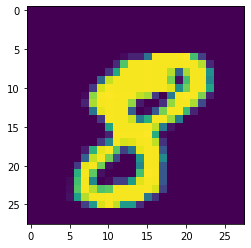

In [8]:
# Displaying one sample from nput data
mth = 10
plt.imshow(X_norm[mth].reshape(dim,dim))
plt.show()

5. Build Sequential model.

In [9]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding = 'same',input_shape = (dim, dim, 1), activation = 'relu')) # Convolution layer for featuer extraction.
model.add(MaxPooling2D(2,2)) # Pooling layer for downsampling features.
model.add(Conv2D(64, (3,3), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2)) # Dropout layer to reduce overfitting.
model.add(Conv2D(128, (3,3), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten()) # Flatting data from (m,h,w,c) to (m,h*w*c)
model.add(Dense(256, activation = 'relu')) # Dense layer
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = 'softmax')) # Output dense layer with softmax activtion for multiclass classification.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
__________

6. Compile Model with loss function and optimizer.

In [11]:
opt = optimizers.SGD(lr=0.01) # Optimizer (SGD (Stochastic Gradient Descent) used here)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy']) # loss is categorical crossentropy for multiclass

7. Train model on data.

In [12]:
history = model.fit(X_norm, Y, validation_split = 0.3, batch_size = 32, epochs = 70) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 29399 samples, validate on 12601 samples
Epoch 1/70
29399/29399 [==============================] - 11s 383us/step - loss: 0.9066 - acc: 0.6976 - val_loss: 0.1817 - val_acc: 0.9436
Epoch 2/70
29399/29399 [==============================] - 8s 280us/step - loss: 0.2488 - acc: 0.9222 - val_loss: 0.1183 - val_acc: 0.9648
Epoch 3/70
29399/29399 [==============================] - 8s 282us/step - loss: 0.1817 - acc: 0.9421 - val_loss: 0.0881 - val_acc: 0.9746
Epoch 4/70
29399/29399 [==============================] - 8s 280us/step - loss: 0.1460 - acc: 0.9546 - val_loss: 0.0745 - val_acc: 0.9763
Epoch 5/70
29399/29399 [==============================] - 8s 281us/step - loss: 0.1278 - acc: 0.9600 - val_loss: 0.0626 - val_acc: 0.9806
Epoch 6/70
29399/29399 [==============================] - 8s 281us/step - loss: 0.1101 - acc: 0.9668 - val_loss: 0.0551 - val_acc: 0.9825
Epoch 7/70
29399/29399 [===

29399/29399 [==============================] - 8s 282us/step - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0267 - val_acc: 0.9925
Epoch 58/70
29399/29399 [==============================] - 8s 279us/step - loss: 0.0189 - acc: 0.9942 - val_loss: 0.0269 - val_acc: 0.9920
Epoch 59/70
29399/29399 [==============================] - 8s 278us/step - loss: 0.0204 - acc: 0.9931 - val_loss: 0.0269 - val_acc: 0.9918
Epoch 60/70
29399/29399 [==============================] - 10s 324us/step - loss: 0.0204 - acc: 0.9930 - val_loss: 0.0268 - val_acc: 0.9919
Epoch 61/70
29399/29399 [==============================] - 8s 278us/step - loss: 0.0194 - acc: 0.9936 - val_loss: 0.0264 - val_acc: 0.9921
Epoch 62/70
29399/29399 [==============================] - 8s 278us/step - loss: 0.0180 - acc: 0.9944 - val_loss: 0.0259 - val_acc: 0.9922
Epoch 63/70
29399/29399 [==============================] - 8s 279us/step - loss: 0.0180 - acc: 0.9940 - val_loss: 0.0253 - val_acc: 0.9924
Epoch 64/70
29399/29399 [=============

In [13]:
%matplotlib inline # required on jupyter notebook for plotting in each line.

UsageError: unrecognized arguments: # required on jupyter notebook for plotting in each line.


PLOTTING ACCURACY CURVE.

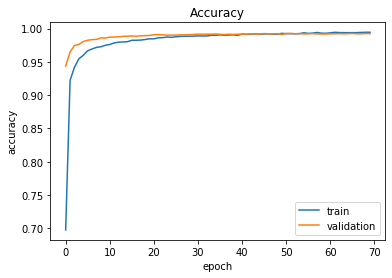

In [14]:
plt.plot(history.history['acc'], label = 'train')
plt.plot(history.history['val_acc'], label = 'validation')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')
plt.show()

PLOTTING LOSS CURVE

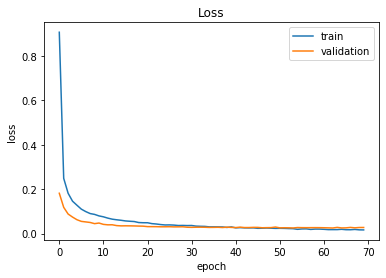

In [15]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.show()